In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappop, heappush


In [6]:
node_pos = {'A':(1,2),'B':(2,1),'C':(2,3),'D':(3,3),'E':(4,1),'F':(5,3)}


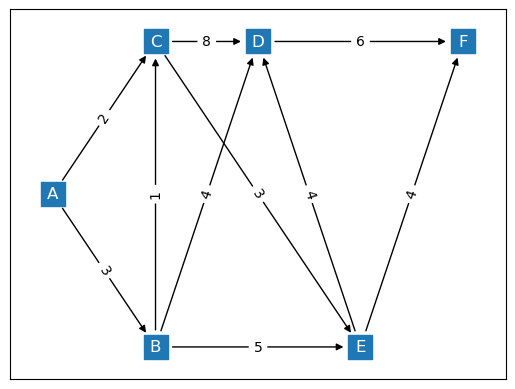

In [8]:

G = nx.DiGraph()

G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')

G.add_edge('A', 'B', weight=3)
G.add_edge('A', 'C', weight=2)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=5)
G.add_edge('C', 'D', weight=8)
G.add_edge('C', 'E', weight=3)
G.add_edge('E', 'F', weight=4)
G.add_edge('D', 'F', weight=6)
G.add_edge('B', 'D', weight=4)
G.add_edge('E', 'D', weight=4)


def show_wgraph():
    
    plt.figure() 
    
    weight_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx(G,node_pos,font_color = 'white', node_shape = 's', with_labels = True,)
    output = nx.draw_networkx_edge_labels(G,node_pos,edge_labels=weight_labels)

show_wgraph()


In [ ]:
def custom_heuristic(node, goal):

    heuristic_values = {"A": 10, "B": 16, "C": 6, "D": 4,"E": 6,"F": 9}
    return heuristic_values[node]

In [ ]:
def astar(G, start, goal,custom_heuristic):
    open_list = [(0, start)]  
    closed_list=[]
    came_from = {}            
    g_score = {node: float('inf') for node in G.nodes}
    g_score[start] = 0

    while open_list:
        f, current_node = heappop(open_list)

        if current_node == goal:
            path = []
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path

        for neighbor, edge_data in G[current_node].items():
            cost = g_score[current_node] + edge_data['weight']
            if cost < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = cost
                priority = cost + custom_heuristic(neighbor, goal)
                heappush(open_list, (priority, neighbor))

    return None 

In [ ]:
start_node = "A"
goal_node = "F"

path = astar(G, start_node, goal_node, custom_heuristic)
if path:
    print("Shortest path:", path)
else:
    print("No path found")

Shortest path: ['A', 'C', 'E', 'F']


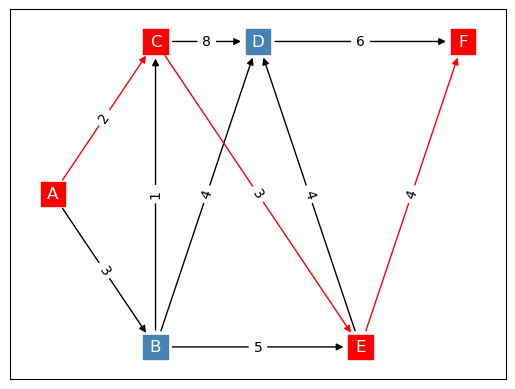

In [ ]:
def show_wpath_d(from_node, to_node,custom_node_positions=None):
    plt.figure() 
    
    if custom_node_positions==None:
        pos = nx.spring_layout(G)
    else:
        pos=custom_node_positions
    
    weight_labels = nx.get_edge_attributes(G,'weight')
    
    path = astar(G, start_node, goal_node, custom_heuristic)


    edges_path = list(zip(path,path[1:]))
    edges_path_reversed = [(y,x) for (x,y) in edges_path]
    edges_path = edges_path + edges_path_reversed
    edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]

    nodecol = ['steelblue' if not node in path else 'red' for node in G.nodes()]
    nx.draw_networkx(G, pos, with_labels = True, font_color = 'white', edge_color= edge_colors, node_shape = 's', node_color = nodecol)    
    nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels)

show_wpath_d('A','F',node_pos)